# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)

        # Ensure datetime column is present
        if 'tpep_pickup_datetime' not in df_month.columns:
            raise ValueError(f"'tpep_pickup_datetime' column not found in {file_name}")

        # Convert to datetime format if not already
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])

        # Extract 'date' and 'hour' from 'tpep_pickup_datetime'
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # Initialize a temporary dataframe for the sampled data of this month
        sampled_data = pd.DataFrame()

        # Loop through each unique date
        for date in df_month['date'].unique():
            df_day = df_month[df_month['date'] == date]

            # Loop through each hour (0 to 23)
            for hour in range(24):
                hour_data = df_day[df_day['hour'] == hour]

                if not hour_data.empty:
                    # Sample 5% of the data for this hour
                    sample = hour_data.sample(frac=0.05, random_state=42)

                    # Append the sampled data to sampled_data dataframe
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # After processing all dates and hours of the current month, add to the final dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Completed sampling for file: {file_name}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
# Now 'df' will have the combined sampled data for the entire year
print(f"Final sampled data shape: {df.shape}")

Completed sampling for file: 2023-1.parquet
Completed sampling for file: 2023-2.parquet
Completed sampling for file: 2023-3.parquet
Completed sampling for file: 2023-4.parquet
Completed sampling for file: 2023-5.parquet
Completed sampling for file: 2023-6.parquet
Completed sampling for file: 2023-7.parquet
Completed sampling for file: 2023-8.parquet
Completed sampling for file: 2023-9.parquet
Completed sampling for file: 2023-10.parquet
Completed sampling for file: 2023-11.parquet
Completed sampling for file: 2023-12.parquet
Final sampled data shape: (1896400, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
#Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/sample_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/sample_data.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [14]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   
5           7.10         1.0                  N           246            37   
6           1.59         1.0                  N            79           164   
7           3.16         1.0                  N            79           256   
8           7.64         1.0                  N           132            95   
9           0.90         1.0                  N           148           114   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   
5             1  ...      0.5        7.90           0.0   
6             1  ...      0.5        3.28           0.0   
7             1  ...      0.5        6.02           0.0   
8             1  ...      0.5        7.09           0.0   
9             1  ...      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   
5                    1.0         47.40                   2.5         0.00   
6                    1.0         19.68                   2.5         0.00   
7                    1.0         30.12                   2.5         0.00   
8                    1.0         42.54                   0.0         1.25   
9                    1.0         13.90                   2.5         0.00   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  
5  2023-01-01     0         NaN  
6  2023-01-01     0         NaN  
7  2023-01-01     0         NaN  
8  2023-01-01     0         NaN  
9  2023-01-01     0         NaN  

[10 rows x 22 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [16]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Step 1: Calculate the overall median
median_fee = df['Airport_fee'].median()

# Step 2: Fill NaN values with that median
df['Airport_fee'] = df['Airport_fee'].fillna(median_fee)

print(df)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  Rat

In [18]:
# Step 1: Calculate the overall median
median_fee = df['airport_fee'].median()

# Step 2: Fill NaN values with that median
df['airport_fee'] = df['airport_fee'].fillna(median_fee)

print(df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  Rat

In [19]:
# Combine the two airport fee columns
df['Airport_fee'] = df['airport_fee'] + df['Airport_fee']
df.drop(columns=['airport_fee'], inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...    6.0      0.5        0.00           0.0   
1             1  ...    1.0      0.5        2.58           0.0   
2             2  ...    1.0      0.5        0.00           0.0   
3             2  ...    1.0      0.5        0.00           0.0   
4             0  ...    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date hour  \
0                    1.0         41.15                   0.0  2023-01-01    0   
1                    1.0         15.48                   2.5  2023-01-01    0   
2                    1.0         16.40                   2.5  2023-01-01    0   
3                    1.0         11.50                   2.5  2023-01-01    0   
4                    1.0         35.57                   NaN  2023-01-01    0   

   Airport_fee  
0         1.25  
1         0.00  
2         0.00  
3         0.00  
4         0.00  

[5 rows x 21 columns]

In [20]:
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
...           ...                  ...                   ...              ...   
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
1                 1.24         1.0                  N           161   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
4                19.24         NaN               None            66   
...                ...         ...                ...           ...   
1896395           0.81         1.0                  N           263   
1896396           5.78         1.0                  N           161   
1896397           1.06         1.0                  N            79   
1896398           0.00         NaN               None           166   
1896399           8.45         1.0                  N           142   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 256             2  ...    6.0      0.5        0.00   
1                 237             1  ...    1.0      0.5        2.58   
2                 141             2  ...    1.0      0.5        0.00   
3                 142             2  ...    1.0      0.5        0.00   
4                 107             0  ...    0.0      0.5        5.93   
...               ...           ...  ...    ...      ...         ...   
1896395           262             1  ...    1.0      0.5        2.44   
1896396           261             1  ...    1.0      0.5        4.00   
1896397           137             1  ...    1.0      0.5        2.44   
1896398           244             0  ...    0.0      0.5        0.00   
1896399           261             2  ...    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         41.15   
1                 0.0                    1.0         15.48   
2                 0.0                    1.0         16.40   
3                 0.0                    1.0         11.50   
4                 0.0                    1.0         35.57   
...               ...                    ...           ...   
1896395           0.0                    1.0         14.64   
1896396           0.0                    1.0         36.50   
1896397           0.0                    1.0         14.64   
1896398           0.0                    1.0         16.14   
1896399           0.0                    1.0         45.80   

         congestion_surcharge        date hour  Airport_fee  
0                         0.0  2023-01-01    0         1.25  
1                         2.5  2023-01-01    0         0.00  
2                         2.5  2023-01-01    0         0.00  
3                         2.5  2023-01-01    0         0.00  
4                         NaN  2023-01-01    0         0.00  
...                       ...         ...  ...          ...  
1896395                   2.5  2023-12-31   23         0.00  
1896396                   2.5  2023-12-31   23         0.00  
1896397        

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
df['Airport_fee'].unique()

array([ 1.25,  0.  , -1.25,  1.75, -1.75,  1.  ])

In [22]:
df['fare_amount']

0          32.40
1           7.90
2          11.40
3           6.50
4          25.64
           ...  
1896395     7.20
1896396    27.50
1896397     7.20
1896398    14.64
1896399    40.80
Name: fare_amount, Length: 1896400, dtype: float64

In [23]:
# check where values of fare amount are negative
negative_fare_rows = df[df['fare_amount'] < 0]
negative_fare_rows


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [24]:
df['RatecodeID'].unique()

array([ 1., nan,  2.,  4.,  5., 99.,  3.,  6.])

In [25]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].unique()

array([], dtype=float64)

In [26]:
df['tpep_pickup_datetime'].dtype

dtype('<M8[us]')

In [27]:
# Find which columns have negative values
numerical_cols = df.select_dtypes(include=np.number).columns
df_numerical = df[numerical_cols]

negative_mask = df_numerical < 0


has_negatives = negative_mask.any().any() # Checks entire DataFrame
negative_cols = negative_mask.any()  # Checks columns individually

print(f'negative_cols{negative_cols}')


negative_colsVendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
hour                     False
Airport_fee               True
dtype: bool


In [28]:
print(f'has_negatives{has_negatives}')

has_negativesTrue


In [29]:
# fix these negative values
df[numerical_cols] = df[numerical_cols].mask(negative_mask)
df[numerical_cols]

VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0               2              1.0           7.74         1.0           138   
1               2              2.0           1.24         1.0           161   
2               2              3.0           1.44         1.0           237   
3               2              1.0           0.54         1.0           143   
4               2              NaN          19.24         NaN            66   
...           ...              ...            ...         ...           ...   
1896395         2              1.0           0.81         1.0           263   
1896396         2              1.0           5.78         1.0           161   
1896397         2              1.0           1.06         1.0            79   
1896398         1              NaN           0.00         NaN           166   
1896399         2              5.0           8.45         1.0           142   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40    6.0      0.5        0.00   
1                 237             1         7.90    1.0      0.5        2.58   
2                 141             2        11.40    1.0      0.5        0.00   
3                 142             2         6.50    1.0      0.5        0.00   
4                 107             0        25.64    0.0      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
1896395           262             1         7.20    1.0      0.5        2.44   
1896396           261             1        27.50    1.0      0.5        4.00   
1896397           137             1         7.20    1.0      0.5        2.44   
1896398           244             0        14.64    0.0      0.5        0.00   
1896399           261             2        40.80    1.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         41.15   
1                 0.0                    1.0         15.48   
2                 0.0                    1.0         16.40   
3                 0.0                    1.0         11.50   
4                 0.0                    1.0         35.57   
...               ...                    ...           ...   
1896395           0.0                    1.0         14.64   
1896396           0.0                    1.0         36.50   
1896397           0.0                    1.0         14.64   
1896398           0.0                    1.0         16.14   
1896399           0.0                    1.0         45.80   

         congestion_surcharge  hour  Airport_fee  
0                         0.0     0         1.25  
1                         2.5     0         0.00  
2                         2.5     0         0.00  
3                         2.5     0         0.00  
4                         NaN     0         0.00  
...                       ...   ...          ...  
1896395                   2.5    23         0.00  
1896396                   2.5    23         0.00  
1896397                   2.5    23         0.00  
1896398                   NaN    23         0.00  
1896399                   2.5    23         0.00  

[1896400 rows x 17 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [30]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().sum().sum() / df.size

print(f"Proportion of missing values: {missing_proportion:.2f}")


Proportion of missing values: 0.01


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [31]:
# Display the rows with null values
df[df['passenger_count'].isnull()]
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(1, inplace=True)
df['passenger_count']


0          1.0
1          2.0
2          3.0
3          1.0
4          1.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    5.0
Name: passenger_count, Length: 1896400, dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [32]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 6., 5., 0., 8., 9., 7.])

In [33]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)
df['passenger_count']

0          1.0
1          2.0
2          3.0
3          1.0
4          1.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    5.0
Name: passenger_count, Length: 1896400, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [34]:
# Fix missing values in 'RatecodeID'


# Display the rows with null values
df[df['RatecodeID'].isnull()]
# Impute NaN values in 'RatecodeID'
df['RatecodeID'].fillna(1, inplace=True)
df['RatecodeID']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    1.0
Name: RatecodeID, Length: 1896400, dtype: float64

In [35]:
df['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5., 99.,  3.,  6.])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [36]:
df['congestion_surcharge'].unique()

array([0. , 2.5, nan, 0.5])

In [37]:
# handle null values in congestion_surcharge

# Display the rows with null values
df[df['congestion_surcharge'].isnull()]
# Impute NaN values in 'congestion_surcharge'
df['congestion_surcharge'].fillna(1, inplace=True)
df['congestion_surcharge']


0          0.0
1          2.5
2          2.5
3          2.5
4          1.0
          ... 
1896395    2.5
1896396    2.5
1896397    2.5
1896398    1.0
1896399    2.5
Name: congestion_surcharge, Length: 1896400, dtype: float64

In [38]:
df['congestion_surcharge'].unique()

array([0. , 2.5, 1. , 0.5])

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values

In [40]:
#Identifying the columns with NaN values
df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge     False
date                     False
hour                     False
Airport_fee               True
dtype: bool

In [41]:
df[['store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'Airport_fee']]

store_and_fwd_flag  extra  mta_tax  improvement_surcharge  \
0                        N    6.0      0.5                    1.0   
1                        N    1.0      0.5                    1.0   
2                        N    1.0      0.5                    1.0   
3                        N    1.0      0.5                    1.0   
4                     None    0.0      0.5                    1.0   
...                    ...    ...      ...                    ...   
1896395                  N    1.0      0.5                    1.0   
1896396                  N    1.0      0.5                    1.0   
1896397                  N    1.0      0.5                    1.0   
1896398               None    0.0      0.5                    1.0   
1896399                  N    1.0      0.5                    1.0   

         total_amount  Airport_fee  
0               41.15         1.25  
1               15.48         0.00  
2               16.40         0.00  
3               11.50         0.00  
4               35.57         0.00  
...               ...          ...  
1896395         14.64         0.00  
1896396         36.50         0.00  
1896397         14.64         0.00  
1896398         16.14         0.00  
1896399         45.80         0.00  

[1896400 rows x 6 columns]

In [42]:
#for store_and_fwd_flag

# Calculate the proportion of 'Y'
y_ratio = (df['store_and_fwd_flag'] == 'Y').sum() / df['store_and_fwd_flag'].notna().sum()

# Fill missing based on the threshold
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('Y' if y_ratio > 0.7 else 'N')

In [43]:
df['store_and_fwd_flag']

0          N
1          N
2          N
3          N
4          N
          ..
1896395    N
1896396    N
1896397    N
1896398    N
1896399    N
Name: store_and_fwd_flag, Length: 1896400, dtype: object

In [44]:
# Fix missing values in 'extra'


# Display the rows with null values
df[df['extra'].isnull()]
# Impute NaN values in 'extra'
df['extra'].fillna(1, inplace=True)
df['extra']

0          6.0
1          1.0
2          1.0
3          1.0
4          0.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    0.0
1896399    1.0
Name: extra, Length: 1896400, dtype: float64

In [45]:
# Fix missing values in 'mta_tax'

# Calculate the median of 'mta_tax'
median_mta_tax = df['mta_tax'].median()

# Impute NaN values in 'mta_tax' with the median
df['mta_tax'].fillna(median_mta_tax, inplace=True)

In [46]:
# Fix missing values in 'improvement_surcharge'


# Display the rows with null values
df[df['improvement_surcharge'].isnull()]
# Impute NaN values in 'improvement_surcharge'
df['improvement_surcharge'].fillna(1, inplace=True)
df['improvement_surcharge']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1896395    1.0
1896396    1.0
1896397    1.0
1896398    1.0
1896399    1.0
Name: improvement_surcharge, Length: 1896400, dtype: float64

In [47]:
# Fix missing values in 'total_amount'

# Calculate the median of 'total_amount'
median_total_amount = df['total_amount'].median()

# Impute NaN values in 'total_amount' with the median
df['total_amount'].fillna(median_total_amount, inplace=True)


In [48]:
df['total_amount'].unique()

array([41.15, 15.48, 16.4 , ...,  6.29,  8.37, 10.24])

In [49]:


# Fix missing values in 'Airport_fee'

# Calculate the median of 'Airport_fee'
median_Airport_fee = df['Airport_fee'].median()

# Impute NaN values in 'Airport_fee' with the median
df['Airport_fee'].fillna(median_Airport_fee, inplace=True)

In [50]:
df['Airport_fee'].unique()

array([1.25, 0.  , 1.75, 1.  ])

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [51]:
# Describe the data and check if there are any potential outliers present
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919562   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644038e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898287e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064160e+02   

       congestion_surcharge          hour   Airport_fee  
count          1.896400e+06  1.896400e+06  1.896400e+06  
mean           2.262898e+00  1.426504e+01  1.380220e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.965477e-01  5.807381e+00  4.575627e-01

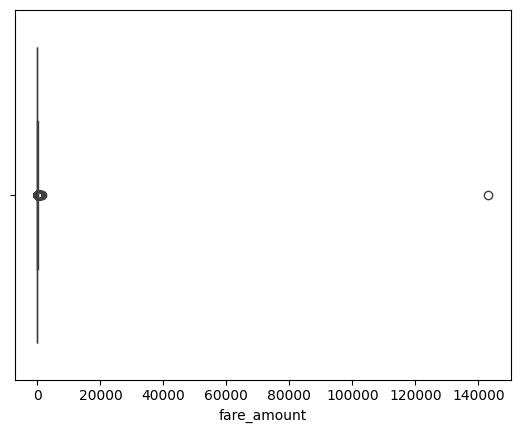

In [52]:
# Check for potential out of place values in various columns
# Visualize data distribution to identify outliers (using boxplots, histograms, etc.)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['fare_amount']) # Example for 'fare_amount' column
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [53]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [54]:
df['passenger_count'].unique()

array([1., 2., 3., 4., 6., 5.])

In [55]:
# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

In [56]:
# Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [57]:
# Remove entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

In [58]:
# Remove entries where payment_type is 0
df = df[df['payment_type'] != 0]

In [59]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831391e+06                     1831391                     1831391   
mean   1.736326e+00  2023-07-01 21:14:55.639029  2023-07-01 21:32:17.626761   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:10:57         2023-04-01 20:25:37   
50%    2.000000e+00         2023-06-26 08:19:48         2023-06-26 08:35:52   
75%    2.000000e+00  2023-10-05 19:16:32.500000         2023-10-05 19:34:35   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406249e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831391e+06   1.831391e+06  1.831391e+06  1.831391e+06   
mean      1.385349e+00   3.444838e+00  1.634046e+00  1.654589e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.764050e-01   4.545772e+00  7.390655e+00  6.367245e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06   
mean   1.643336e+02  1.205003e+00  1.981667e+01  1.638297e+00  4.953643e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.973985e+01  4.664804e-01  1.073392e+02  1.836114e+00  4.823566e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.831391e+06  1.831391e+06           1.831391e+06  1.831391e+06   
mean   3.573526e+00  5.958122e-01           9.993253e-01  2.894106e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.070000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.069437e+00  2.183799e+00           2.409203e-02  1.082166e+02   

       congestion_surcharge          hour   Airport_fee  
count          1.831391e+06  1.831391e+06  1.831391e+06  
mean           2.307767e+00  1.429542e+01  1.429102e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.660222e-01  5.776975e+00  4.648432e-01

In [60]:
#Do any columns need standardising?

from sklearn.preprocessing import MinMaxScaler

#Select the numerical columns to be standardized
numerical_cols = ['fare_amount', 'total_amount', 'RatecodeID', 'mta_tax', 'congestion_surcharge']  # Add other columns as needed

#Create a MinMaxScaler object
scaler = MinMaxScaler()

#Fit the scaler on the selected columns and transform them
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [61]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.831391e+06                     1831391                     1831391   
mean   1.736326e+00  2023-07-01 21:14:55.639029  2023-07-01 21:32:17.626761   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:10:57         2023-04-01 20:25:37   
50%    2.000000e+00         2023-06-26 08:19:48         2023-06-26 08:35:52   
75%    2.000000e+00  2023-10-05 19:16:32.500000         2023-10-05 19:34:35   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406249e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831391e+06   1.831391e+06  1.831391e+06  1.831391e+06   
mean      1.385349e+00   3.444838e+00  6.469862e-03  1.654589e+02   
min       1.000000e+00   0.000000e+00  0.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  0.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  0.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  0.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  1.000000e+00  2.650000e+02   
std       8.764050e-01   4.545772e+00  7.541485e-02  6.367245e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06  1.831391e+06   
mean   1.643336e+02  1.205003e+00  1.384199e-04  1.638297e+00  1.238411e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  6.496071e-05  0.000000e+00  1.250000e-01   
50%    1.620000e+02  1.000000e+00  9.429781e-05  1.000000e+00  1.250000e-01   
75%    2.340000e+02  1.000000e+00  1.529720e-04  2.500000e+00  1.250000e-01   
max    2.650000e+02  4.000000e+00  1.000000e+00  1.425000e+01  1.000000e+00   
std    6.973985e+01  4.664804e-01  7.497667e-04  1.836114e+00  1.205892e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.831391e+06  1.831391e+06           1.831391e+06  1.831391e+06   
mean   3.573526e+00  5.958122e-01           9.993253e-01  2.021483e-04   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.114779e-04   
50%    2.860000e+00  0.000000e+00           1.000000e+00  1.466814e-04   
75%    4.450000e+00  0.000000e+00           1.000000e+00  2.144342e-04   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.000000e+00   
std    4.069437e+00  2.183799e+00           2.409203e-02  7.558740e-04   

       congestion_surcharge          hour   Airport_fee  
count          1.831391e+06  1.831391e+06  1.831391e+06  
mean           9.231068e-01  1.429542e+01  1.429102e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            1.000000e+00  1.100000e+01  0.000000e+00  
50%            1.000000e+00  1.500000e+01  0.000000e+00  
75%            1.000000e+00  1.900000e+01  0.000000e+00  
max            1.000000e+00  2.300000e+01  1.750000e+00  
std            2.664089e-01  5.776975e+00  4.648432e-01

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [62]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [63]:
# Get the data types of each column
variable_types = df.dtypes

# Print the variable types
print(variable_types)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
date                             object
hour                              int32
Airport_fee                     float64
dtype: object


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

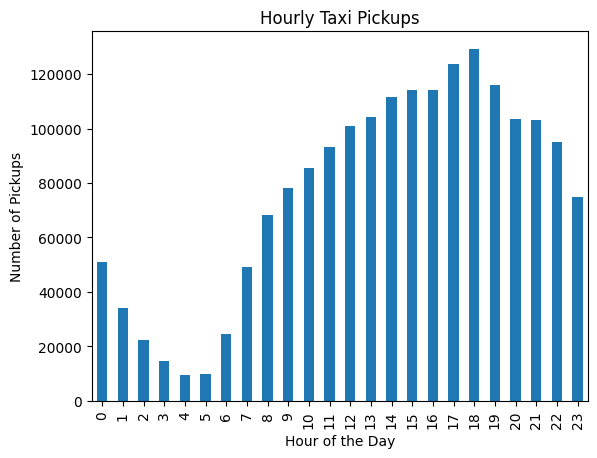

In [64]:
# Find and show the hourly trends in taxi pickups
pickups_by_hour = df.groupby(df['tpep_pickup_datetime'].dt.hour)['VendorID'].count()
pickups_by_hour.plot(kind='bar')
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()


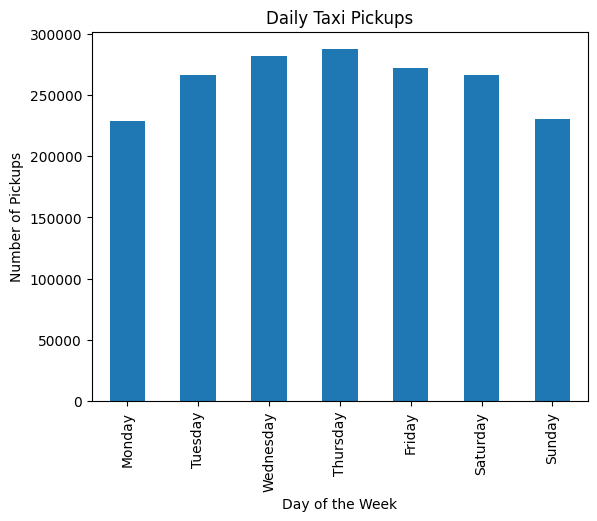

In [65]:
# Find and show the daily trends in taxi pickups (days of the week)

pickups_by_day = df.groupby(df['tpep_pickup_datetime'].dt.dayofweek)['VendorID'].count()

# dayofweek: 0 = Monday, 6 = Sunday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pickups_by_day.index = days  # Replace day numbers with day names

pickups_by_day.plot(kind='bar')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

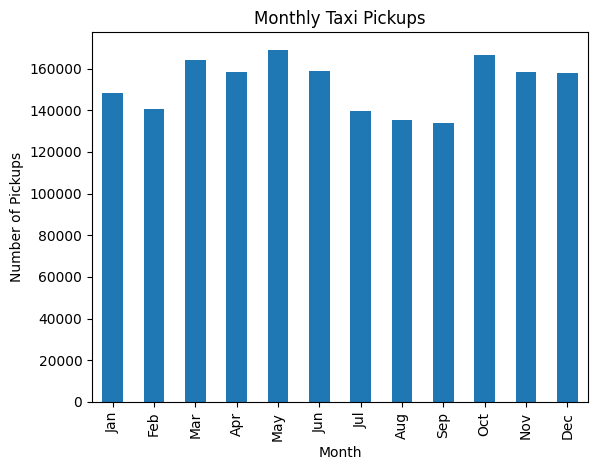

In [66]:
# Show the monthly trends in pickups

pickups_by_month = df.groupby(df['tpep_pickup_datetime'].dt.month)['VendorID'].count()
pickups_by_month.plot(kind='bar')
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [67]:
# Analyse the above parameters
#Take a look at the financial parameters like fare_amount, tip_amount, total_amount, and also trip_distance. Do these contain zero/negative values?
# Check for zero/negative values in financial columns
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a boolean mask for zero/negative values
zero_neg_mask = df[financial_cols].le(0).any(axis=1) # le(0) checks for less than or equal to 0

# Display rows with zero/negative values
print(df[zero_neg_mask])

# Alternatively, you can also check the number of such occurrences
print("Number of rows with zero/negative values:")
print(zero_neg_mask.sum())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
10              2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
16              2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
...           ...                  ...                   ...              ...   
1896385         2  2023-12-31 23:43:05   2023-12-31 23:48:31              1.0   
1896386         2  2023-12-31 23:23:43   2023-12-31 23:35:31              1.0   
1896388         2  2023-12-31 23:15:53   2023-12-31 23:21:02              1.0   
1896389         1  2023-12-31 23:06:37   2023-12-31 23:20:15              1.0   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  Rat

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the fare_amount, tip_amount, total_amount, and also trip_distance columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [68]:
# Create a df with non zero entries for the selected parameters.
# but keep zero-distance if fare is valid.
df_filtered = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    ((df['trip_distance'] > 0) | (df['PULocationID'] == df['DOLocationID']))  # Keep if distance > 0 OR pickup and dropoff are the same
]
df_filtered

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6               2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7               2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8               2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
...           ...                  ...                   ...              ...   
1896393         2  2023-12-31 23:03:04   2023-12-31 23:13:06              1.0   
1896394         2  2023-12-31 23:38:35   2024-01-01 00:05:50              5.0   
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1                 1.24         0.0                  N           161   
5                 7.10         0.0                  N           246   
6                 1.59         0.0                  N            79   
7                 3.16         0.0                  N            79   
8                 7.64         0.0                  N           132   
...                ...         ...                ...           ...   
1896393           1.27         0.0                  N            79   
1896394           9.29         0.0                  N            48   
1896395           0.81         0.0                  N           263   
1896396           5.78         0.0                  N           161   
1896397           1.06         0.0                  N            79   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
1                 237             1  ...    1.0    0.125        2.58   
5                  37             1  ...    3.5    0.125        7.90   
6                 164             1  ...    1.0    0.125        3.28   
7                 256             1  ...    1.0    0.125        6.02   
8                  95             1  ...    1.0    0.125        7.09   
...               ...           ...  ...    ...      ...         ...   
1896393           158             1  ...    1.0    0.125        3.14   
1896394            25             1  ...    1.0    0.125        9.30   
1896395           262             1  ...    1.0    0.125        2.44   
1896396           261             1  ...    1.0    0.125        4.00   
1896397           137             1  ...    1.0    0.125        2.44   

         tolls_amount  improvement_surcharge  total_amount  \
1                 0.0                    1.0      0.000108   
5                 0.0                    1.0      0.000331   
6                 0.0                    1.0      0.000137   
7                 0.0                    1.0      0.000210   
8                 0.0                    1.0      0.000297   
...               ...                    ...           ...   
1896393           0.0                    1.0      0.000132   
1896394           0.0                    1.0      0.000390   
1896395           0.0                    1.0      0.000102   
1896396           0.0                    1.0      0.000255   
1896397           0.0                    1.0      0.000102   

         congestion_surcharge        date hour  Airport_fee  
1                         1.0  2023-01-01    0         0.00  
5                         1.0  2023-01-01    0         0.00  
6                         1.0  2023-01-01    0         0.00  
7                         1.0  2023-01-01    0         0.00  
8                         0.0  2023-01-01    0         1.25  
...                       ...         ...  ...          ...  
1896393                   1.0  2023-12-31   23         0.00  
1896394                   1.0  2023-12-31   23         0.00  
1896395        

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [69]:
# Group data by month and analyse monthly revenue(total_amount)
monthly_revenue = df_filtered.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='M'))['total_amount'].sum()
print(monthly_revenue)


tpep_pickup_datetime
2022-12-31     0.000094
2023-01-31    22.618186
2023-02-28    21.492322
2023-03-31    25.914879
2023-04-30    25.154234
2023-05-31    27.625057
2023-06-30    25.881965
2023-07-31    21.953605
2023-08-31    21.255412
2023-09-30    22.451272
2023-10-31    27.966394
2023-11-30    26.237511
2023-12-31    25.559609
Freq: ME, Name: total_amount, dtype: float64


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [70]:
# Calculate proportion of each quarter
# Group data by quarter and analyse quarterly revenue(total_amount)

quarterly_revenue = df_filtered.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='Q'))['total_amount'].sum()
print(quarterly_revenue)

tpep_pickup_datetime
2022-12-31     0.000094
2023-03-31    70.025386
2023-06-30    78.661256
2023-09-30    65.660289
2023-12-31    79.763514
Freq: QE-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

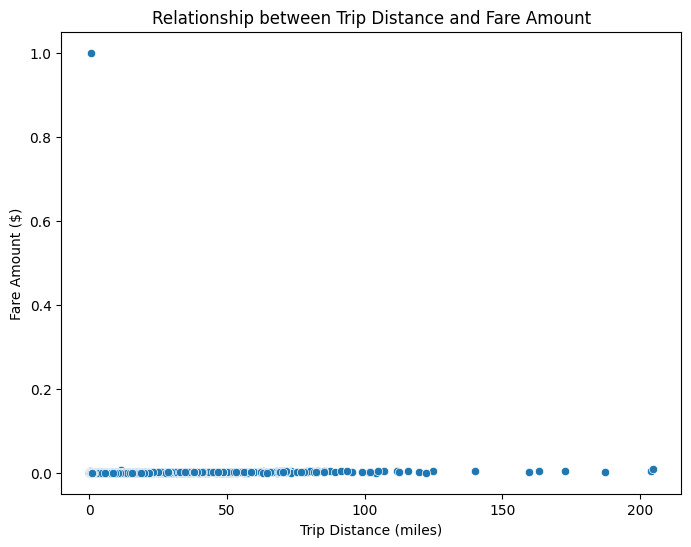

Correlation between trip distance and fare amount: 0.15624640665018347


In [71]:
# Show how trip fare is affected by distance

# Filter out trips with trip_distance = 0
filtered_df = df[df['trip_distance'] > 0]

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate the correlation
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [72]:
# Show relationship between fare and trip duration

#trip duration calculated by the pickup time and dropoff time
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

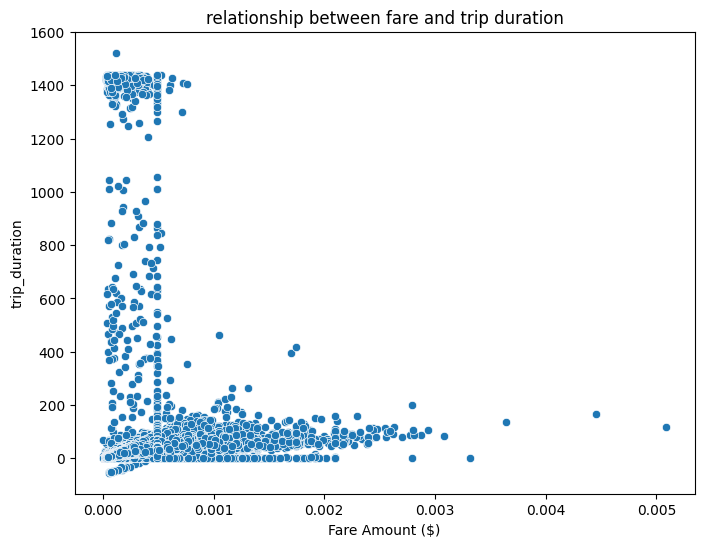

Correlation between fare and trip duration: 0.3206831725298976


In [73]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare_amount', y='trip_duration', data=df_filtered)
plt.title('relationship between fare and trip duration')
plt.xlabel('Fare Amount ($)')
plt.ylabel('trip_duration')
plt.show()

# Calculate the correlation
correlation = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print(f"Correlation between fare and trip duration: {correlation}")

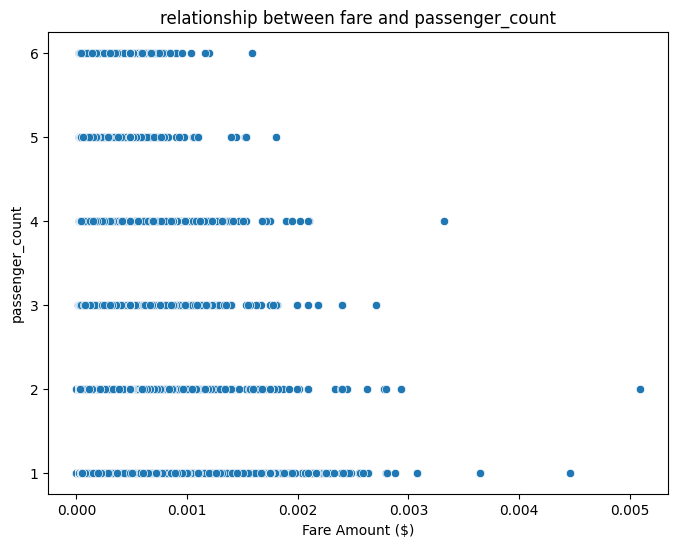

Correlation between fare and passenger_count: 0.040745441355039776


In [74]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8, 6))
sns.scatterplot(x='fare_amount', y='passenger_count', data=df_filtered)
plt.title('relationship between fare and passenger_count')
plt.xlabel('Fare Amount ($)')
plt.ylabel('passenger_count')
plt.show()

# Calculate the correlation
correlation = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
print(f"Correlation between fare and passenger_count: {correlation}")

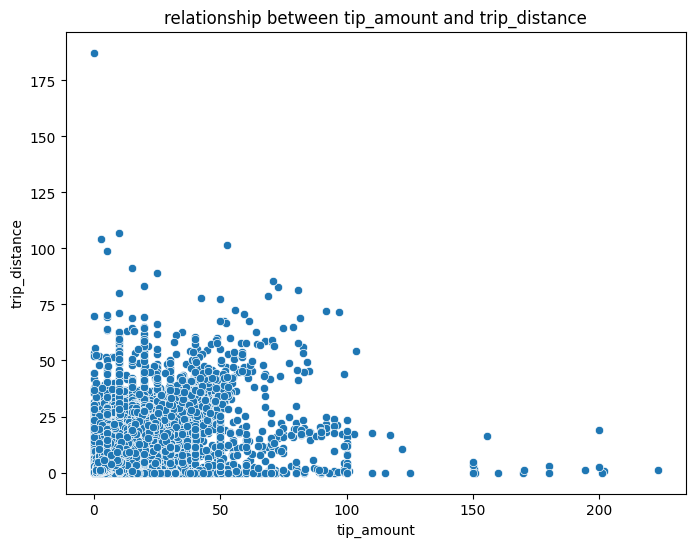

Correlation between tip_amount and trip_distance: 0.7780958355057659


In [75]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tip_amount', y='trip_distance', data=df_filtered)
plt.title('relationship between tip_amount and trip_distance')
plt.xlabel('tip_amount')
plt.ylabel('trip_distance')
plt.show()

# Calculate the correlation
correlation = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
payment_type
1    0.814846
2    0.172771
4    0.007465
3    0.004918
Name: proportion, dtype: float64


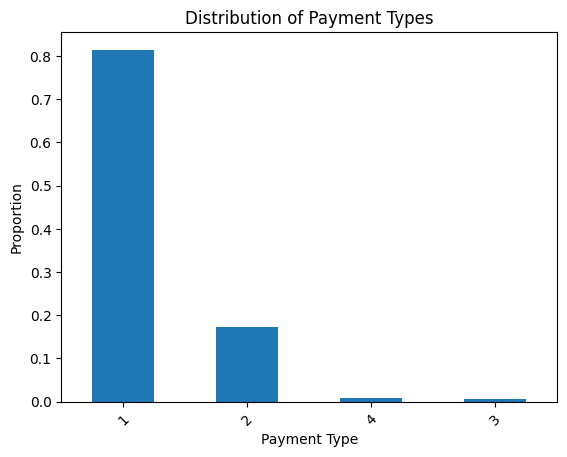

In [76]:
# Analyse the distribution of different payment types (payment_type).

payment_type_distribution = df['payment_type'].value_counts(normalize=True)

# Print the distribution
print("Payment Type Distribution:")
print(payment_type_distribution)

# Visualize the distribution using a bar plot
payment_type_distribution.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Keep x-axis labels horizontal
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [77]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/taxi_zones')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [80]:
# Read the shapefile using geopandas
os.chdir('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/taxi_zones')
zones = gpd.read_file('taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

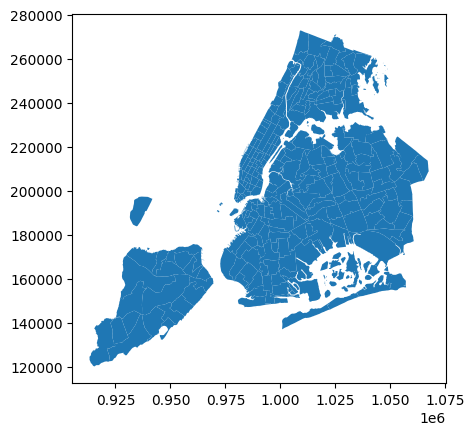

In [81]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [82]:
# Merge zones and trip records using locationID and PULocationID
merged_data = pd.merge(df_filtered, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
2               2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
3               2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
4               2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
...           ...                  ...                   ...              ...   
1418266         2  2023-12-31 23:03:04   2023-12-31 23:13:06              1.0   
1418267         2  2023-12-31 23:38:35   2024-01-01 00:05:50              5.0   
1418268         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1418269         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1418270         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.24         0.0                  N           161   
1                 7.10         0.0                  N           246   
2                 1.59         0.0                  N            79   
3                 3.16         0.0                  N            79   
4                 7.64         0.0                  N           132   
...                ...         ...                ...           ...   
1418266           1.27         0.0                  N            79   
1418267           9.29         0.0                  N            48   
1418268           0.81         0.0                  N           263   
1418269           5.78         0.0                  N           161   
1418270           1.06         0.0                  N            79   

         DOLocationID  payment_type  ...  hour  Airport_fee  trip_duration  \
0                 237             1  ...     0         0.00       5.083333   
1                  37             1  ...     0         0.00      33.616667   
2                 164             1  ...     0         0.00      10.516667   
3                 256             1  ...     0         0.00      15.883333   
4                  95             1  ...     0         1.25      17.133333   
...               ...           ...  ...   ...          ...            ...   
1418266           158             1  ...    23         0.00      10.033333   
1418267            25             1  ...    23         0.00      27.250000   
1418268           262             1  ...    23         0.00       5.916667   
1418269           261             1  ...    23         0.00      19.533333   
1418270           137             1  ...    23         0.00       3.966667   

         OBJECTID  Shape_Leng  Shape_Area                       zone  \
0           161.0    0.035804    0.000072             Midtown Center   
1           246.0    0.069467    0.000281  West Chelsea/Hudson Yards   
2            79.0    0.042625    0.000108               East Village   
3            79.0    0.042625    0.000108               East Village   
4           132.0    0.245479    0.002038                JFK Airport   
...           ...         ...         ...                        ...   
1418266      79.0    0.042625    0.000108               East Village   
1418267      48.0    0.043747    0.000094               Clinton East   
1418268     263.0    0.037017    0.000066             Yorkville West   
1418269     161.0    0.035804    0.000072             Midtown Center   
1418270      79.0    0.042625    0.000108               East Village   

         LocationID    borough  \
0             161.0  Manhattan   
1             246.0  Manhattan   
2              79.0  Manhattan   
3              79.0  Manhattan   
4             132.0     Queens   
...             ...        ...   
1418266        79.0  Manhattan   
1418267        48.0  Manhattan   
1418268       263.0  Manhattan   
1418269       161.0  Manhattan   
1418270

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [83]:
# Group data by location and calculate the number of trips per location ID
trips_per_location = merged_data.groupby('PULocationID')['VendorID'].count()
trips_per_location

PULocationID
1        119
2          2
4       1417
6          2
7        274
       ...  
261     6946
262    19342
263    27952
264    13290
265      548
Name: VendorID, Length: 237, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [84]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_location, left_on='LocationID', right_index=True, how='left')
zones.rename(columns={'VendorID': 'trip_count'}, inplace=True)
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trip_count  
0         119.0  
1           2.0  
2           NaN  
3        1417.0  
4           NaN  
..          ...  
258         2.0  
259       108.0  
260      6946.0  
261     19342.0  
262     27952.0  

[263 rows x 8 columns]

In [85]:
zones['trip_count'].fillna(0, inplace=True)
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trip_count  
0         119.0  
1           2.0  
2           0.0  
3        1417.0  
4           0.0  
..          ...  
258         2.0  
259       108.0  
260      6946.0  
261     19342.0  
262     27952.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

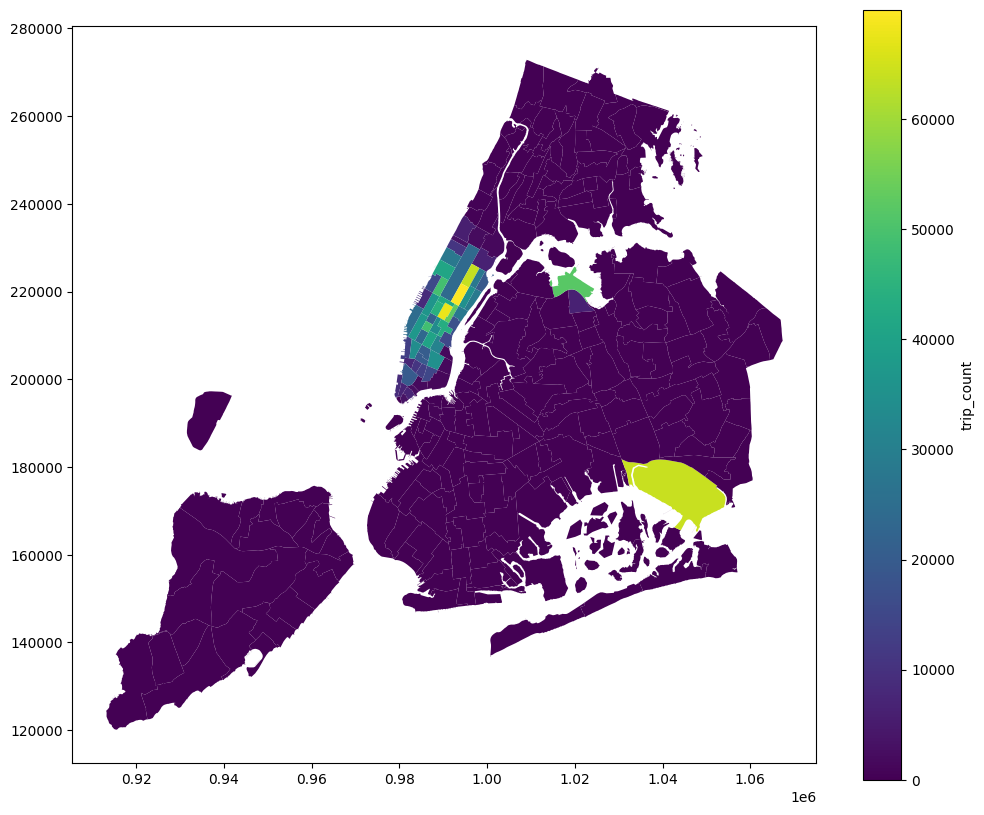

In [86]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(
  column = 'trip_count',
  ax = ax,
  legend = True,
  legend_kwds = {'label': "trip_count", 'orientation': "vertical"}
)


In [87]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by=['trip_count'], ascending=False)
display(zones_sorted)

OBJECTID  Shape_Leng  Shape_Area                               zone  \
236       237    0.042213    0.000096              Upper East Side South   
160       161    0.035804    0.000072                     Midtown Center   
131       132    0.245479    0.002038                        JFK Airport   
235       236    0.044252    0.000103              Upper East Side North   
161       162    0.035270    0.000048                       Midtown East   
..        ...         ...         ...                                ...   
213       214    0.135300    0.000812           South Beach/Dongan Hills   
121       122    0.066532    0.000227                             Hollis   
146       147    0.058765    0.000106                           Longwood   
83         84    0.233624    0.002074  Eltingville/Annadale/Prince's Bay   
186       187    0.126868    0.000421                      Port Richmond   

     LocationID        borough  \
236         237      Manhattan   
160         161      Manhattan   
131         132         Queens   
235         236      Manhattan   
161         162      Manhattan   
..          ...            ...   
213         214  Staten Island   
121         122         Queens   
146         147          Bronx   
83           84  Staten Island   
186         187  Staten Island   

                                              geometry  trip_count  
236  POLYGON ((993633.442 216961.016, 993507.232 21...     69943.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...     67855.0  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...     64045.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...     63781.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...     52780.0  
..                                                 ...         ...  
213  POLYGON ((960669.201 156319.132, 960902.551 15...         0.0  
121  POLYGON ((1051539.66 201007.013, 1051920.726 2...         0.0  
146  POLYGON ((1013266.371 240896.958, 1013354.947 ...         0.0  
83   POLYGON ((939754.454 131548.91, 939802.804 131...         0.0  
186  MULTIPOLYGON (((946964.115 173161.64, 946977.8...         0.0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [88]:
# Busiest hours, days, and months

# Busiest Hours
busy_hours = df_filtered['tpep_pickup_datetime'].dt.hour.value_counts().head(1)
print("Busiest Hour:\n", busy_hours)

# Busiest Days of the Week
busy_days = df_filtered['tpep_pickup_datetime'].dt.dayofweek.value_counts().head(1)
print("\nBusiest Day of the Week:\n", busy_days)

# Busiest Months
busy_months = df_filtered['tpep_pickup_datetime'].dt.month.value_counts().head(1)
print("\nBusiest Month:\n", busy_months)

Busiest Hour:
 tpep_pickup_datetime
18    103404
Name: count, dtype: int64

Busiest Day of the Week:
 tpep_pickup_datetime
3    225682
Name: count, dtype: int64

Busiest Month:
 tpep_pickup_datetime
5    131234
Name: count, dtype: int64


Monthly Revenue Trend:
 tpep_pickup_datetime
2022-12     0.000094
2023-01    22.618186
2023-02    21.492322
2023-03    25.914879
2023-04    25.154234
2023-05    27.625057
2023-06    25.881965
2023-07    21.953605
2023-08    21.255412
2023-09    22.451272
2023-10    27.966394
2023-11    26.237511
2023-12    25.559609
Freq: M, Name: total_amount, dtype: float64


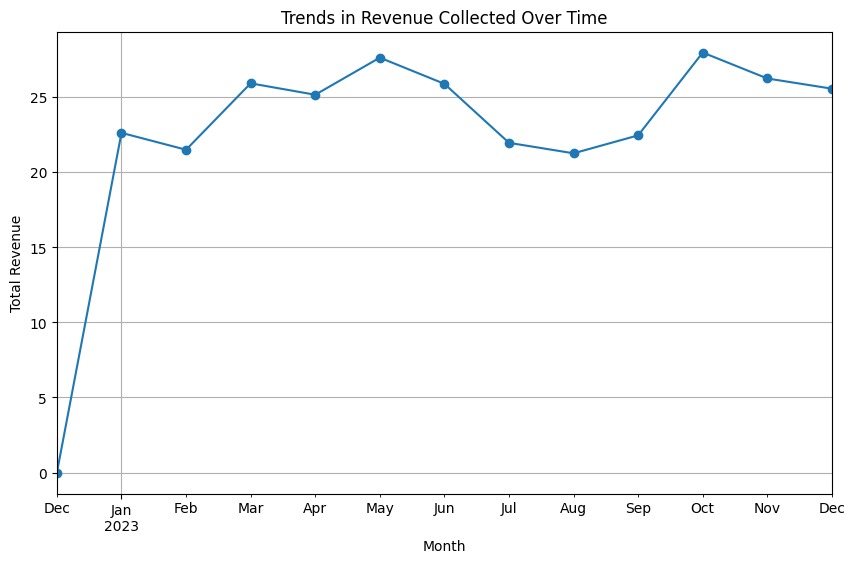

In [89]:
# Trends in revenue collected

# Group data by month and calculate total revenue for each month
monthly_revenue = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.to_period('M'))['total_amount'].sum()

# Print the monthly revenue trend
print("Monthly Revenue Trend:\n", monthly_revenue)

# Visualize the trend using a line plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Trends in Revenue Collected Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

Quarterly Revenue Trend:
 tpep_pickup_datetime
2022Q4     0.000094
2023Q1    70.025386
2023Q2    78.661256
2023Q3    65.660289
2023Q4    79.763514
Freq: Q-DEC, Name: total_amount, dtype: float64


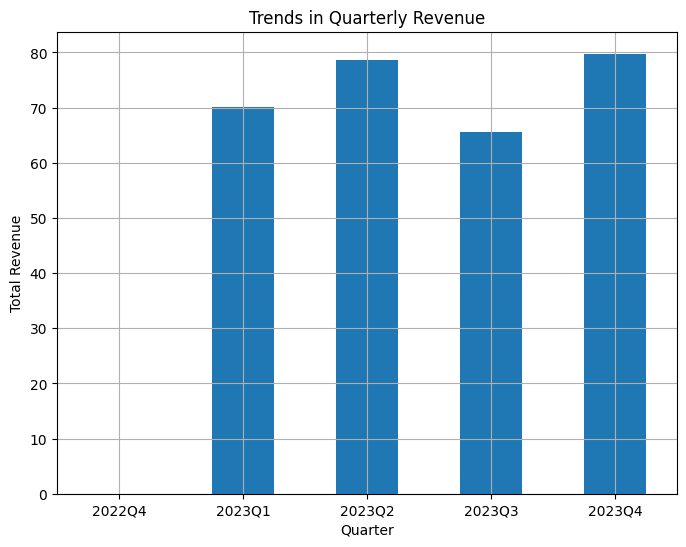

In [90]:
# Trends in quarterly revenue

# Group data by quarter and calculate total revenue for each quarter
quarterly_revenue = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.to_period('Q'))['total_amount'].sum()

# Print the quarterly revenue trend
print("Quarterly Revenue Trend:\n", quarterly_revenue)

# Visualize the trend using a bar plot
plt.figure(figsize=(8, 6))
quarterly_revenue.plot(kind='bar')
plt.title('Trends in Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(True)
plt.show()

In [91]:
# How fare depends on trip distance, trip duration, and passenger counts

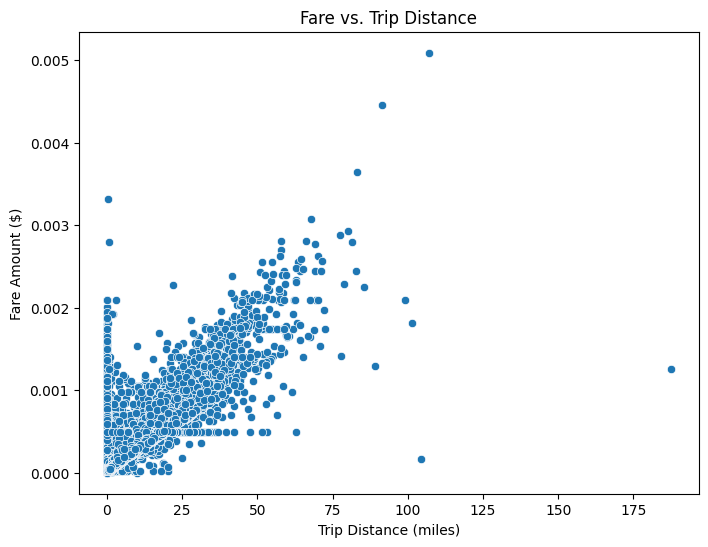

Correlation between fare and trip distance: 0.9299006071499597


In [92]:
# 1. Fare vs. Trip Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered)
plt.title('Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation_distance = df_filtered['fare_amount'].corr(df_filtered['trip_distance'])
print(f"Correlation between fare and trip distance: {correlation_distance}")

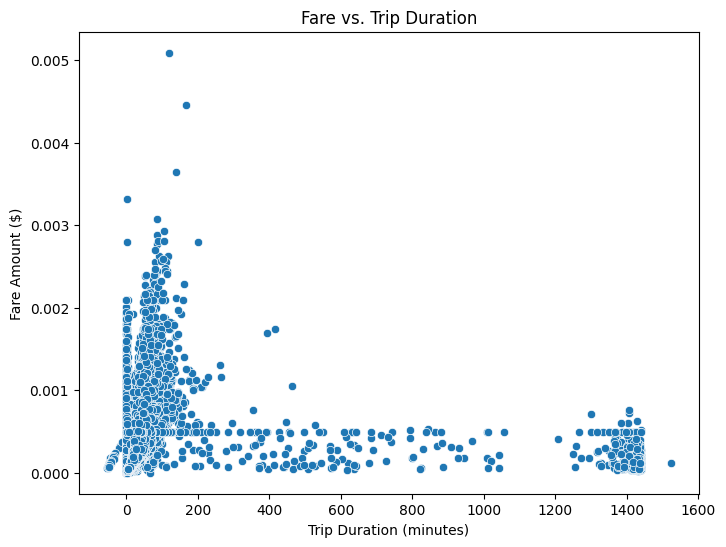

Correlation between Fare and Trip Duration: 0.32068317252989753


In [93]:
# 2. Fare vs. Trip Duration
# 'trip_duration' is not calculated yet,calculating it first:
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_filtered)
plt.title('Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation_fair_duration = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation between Fare and Trip Duration: {correlation_fair_duration}")

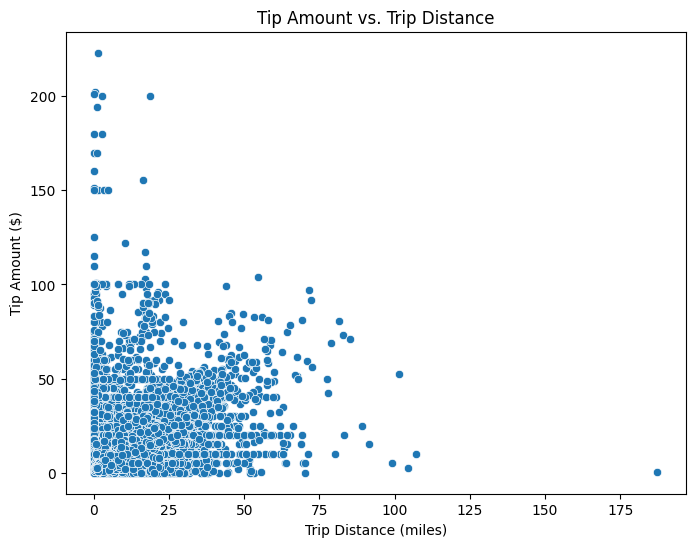

Correlation between tip amount and trip distance: 0.7780958355057659


In [94]:
# tip amount and trip distance:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_filtered)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation_tip_distance = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
print(f"Correlation between tip amount and trip distance: {correlation_tip_distance}")

Top 10 Busiest Zones:
 PULocationID
132    96827
237    86905
161    85948
236    77517
162    65634
138    64177
186    63471
230    61315
142    60887
170    54493
Name: VendorID, dtype: int64


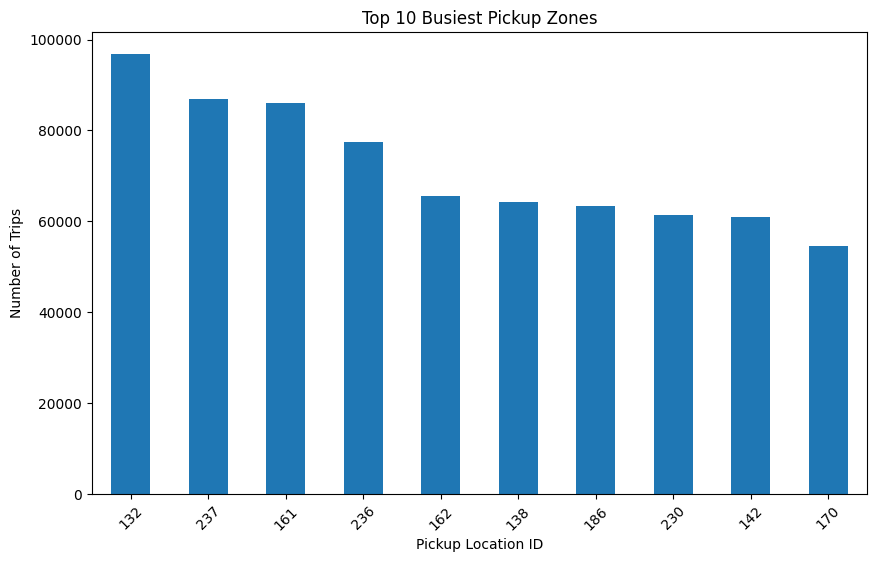

In [95]:
# Busiest zones

# Group by pickup location ID and count the number of trips
busiest_zones = df.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False)

# Print the top 10 busiest zones
print("Top 10 Busiest Zones:\n", busiest_zones.head(10))

# You can also visualize this data using a bar plot:
plt.figure(figsize=(10, 6))
busiest_zones.head(10).plot(kind='bar')
plt.title('Top 10 Busiest Pickup Zones')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [122]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in minutes
df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove invalid durations
df_filtered = df_filtered[df_filtered['trip_duration'] > 0]

# Group by pickup and dropoff locations and hour of the day
grouped_data = df_filtered.groupby(['PULocationID', 'DOLocationID', df_filtered['tpep_pickup_datetime'].dt.hour])

# Calculate average trip duration and distance for each group
route_stats = grouped_data.agg({'trip_duration': 'mean', 'trip_distance': 'mean'})

# Calculate speed for each route and hour
route_stats['speed'] = route_stats['trip_distance'] / route_stats['trip_duration']

# Find the slowest routes
slowest_routes = route_stats.sort_values(by=['speed']).head(10)  # Get top 10 slowest routes

print("Slowest Routes:\n", slowest_routes)

Slowest Routes:
                                                 trip_duration  trip_distance  \
PULocationID DOLocationID tpep_pickup_datetime                                 
224          224          19                         0.450000            0.0   
92           92           20                         0.166667            0.0   
94           94           21                         0.066667            0.0   
95           95           0                          0.133333            0.0   
                          2                          0.125000            0.0   
                          3                          0.200000            0.0   
                          20                         0.433333            0.0   
                          23                         0.200000            0.0   
97           97           16                         0.100000            0.0   
                          18                         0.200000            0.0   

                      

In [120]:
slowest_routes

trip_duration  trip_distance  \
PULocationID DOLocationID tpep_pickup_datetime                                 
224          224          19                         0.450000            0.0   
92           92           20                         0.166667            0.0   
94           94           21                         0.066667            0.0   
95           95           0                          0.133333            0.0   
                          2                          0.125000            0.0   
                          3                          0.200000            0.0   
                          20                         0.433333            0.0   
                          23                         0.200000            0.0   
97           97           16                         0.100000            0.0   
                          18                         0.200000            0.0   

                                                speed  
PULocationID DOLocationID tpep_pickup_datetime         
224          224          19                      0.0  
92           92           20                      0.0  
94           94           21                      0.0  
95           95           0                       0.0  
                          2                       0.0  
                          3                       0.0  
                          20                      0.0  
                          23                      0.0  
97           97           16                      0.0  
                          18                      0.0

In [97]:
df_filtered['trip_duration']

1           5.083333
5          33.616667
6          10.516667
7          15.883333
8          17.133333
             ...    
1896393    10.033333
1896394    27.250000
1896395     5.916667
1896396    19.533333
1896397     3.966667
Name: trip_duration, Length: 1418160, dtype: float64

In [98]:
route_stats

trip_duration  trip_distance  \
PULocationID DOLocationID tpep_pickup_datetime                                 
1            1            3                          2.316667       1.000000   
                          4                          0.488889       0.000000   
                          5                          0.205556       0.000000   
                          6                          1.133333       0.343333   
                          7                          0.194444       0.100000   
...                                                       ...            ...   
265          265          19                         2.331481       1.095185   
                          20                         1.178571       0.676571   
                          21                         1.185714       0.773929   
                          22                         1.237222       0.390000   
                          23                         1.232813       0.132187   

                                                   speed  
PULocationID DOLocationID tpep_pickup_datetime            
1            1            3                     0.431655  
                          4                     0.000000  
                          5                     0.000000  
                          6                     0.302941  
                          7                     0.514286  
...                                                  ...  
265          265          19                    0.469738  
                          20                    0.574061  
                          21                    0.652711  
                          22                    0.315222  
                          23                    0.107224  

[103605 rows x 3 columns]

How does identifying high-traffic, high-demand routes help us?

In [99]:
# Calculate trip frequency for each route
route_frequency = df_filtered.groupby(['PULocationID', 'DOLocationID'])['VendorID'].count().reset_index()
route_frequency.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# Identify high-traffic routes (top 10 based on trip count)
high_traffic_routes = route_frequency.sort_values(by=['trip_count'], ascending=False).head(10)

# Display high-traffic routes
print("High-Traffic Routes:\n", high_traffic_routes)

High-Traffic Routes:
        PULocationID  DOLocationID  trip_count
12055           264           264       10682
10488           237           236       10494
10317           236           237        9058
10316           236           236        6568
10489           237           237        6440
7037            161           237        4813
10439           237           161        4561
7036            161           236        4358
5912            142           239        4076
10731           239           142        3758


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

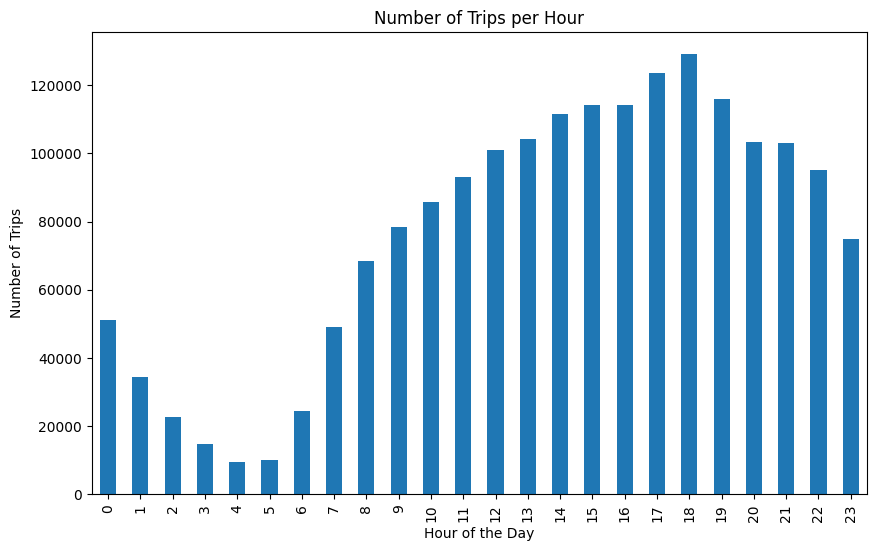

Busiest Hour: 18
Number of Trips during Busiest Hour: 129190


In [100]:
# Visualise the number of trips per hour and find the busiest hour

# Group data by pickup hour and count trips
trips_per_hour = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# Visualize the distribution
trips_per_hour.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
trips_during_busiest_hour = trips_per_hour.max()

print(f"Busiest Hour: {busiest_hour}")
print(f"Number of Trips during Busiest Hour: {trips_during_busiest_hour}")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [101]:
# Find the actual number of trips in the five busiest hours
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Get the five busiest hours
busiest_hours = df_filtered['tpep_pickup_datetime'].dt.hour.value_counts().sort_values(ascending=False).head(5).index

# Calculate the actual number of trips for the busiest hours
actual_trips = []
for hour in busiest_hours:
    trips_in_hour = df_filtered[df_filtered['tpep_pickup_datetime'].dt.hour == hour]['VendorID'].count()
    actual_trips_in_hour = trips_in_hour / sample_fraction
    actual_trips.append((hour, actual_trips_in_hour))

# Display the results
print("Actual Number of Trips in the Five Busiest Hours:")
for hour, trips in actual_trips:
    print(f"Hour: {hour}, Estimated Trips: {trips}")


Actual Number of Trips in the Five Busiest Hours:
Hour: 18, Estimated Trips: 2068040.0
Hour: 17, Estimated Trips: 1945060.0
Hour: 19, Estimated Trips: 1859880.0
Hour: 16, Estimated Trips: 1743640.0
Hour: 15, Estimated Trips: 1719680.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

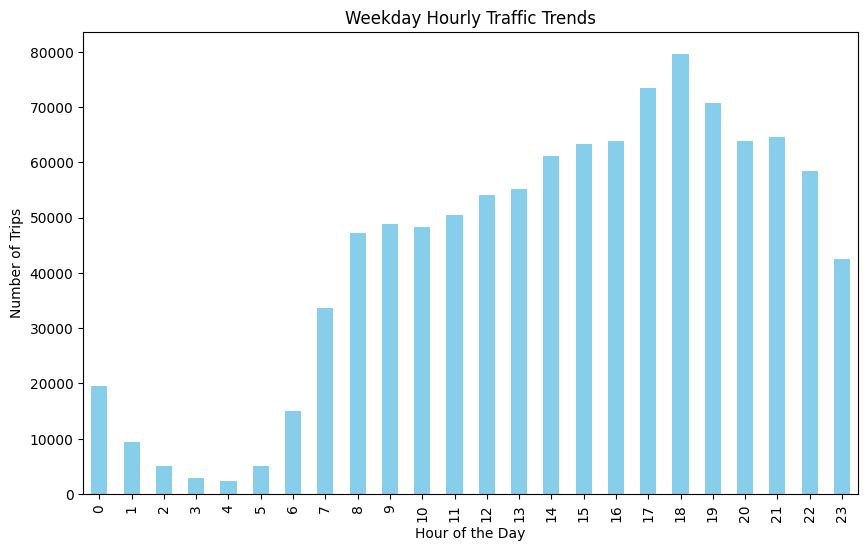

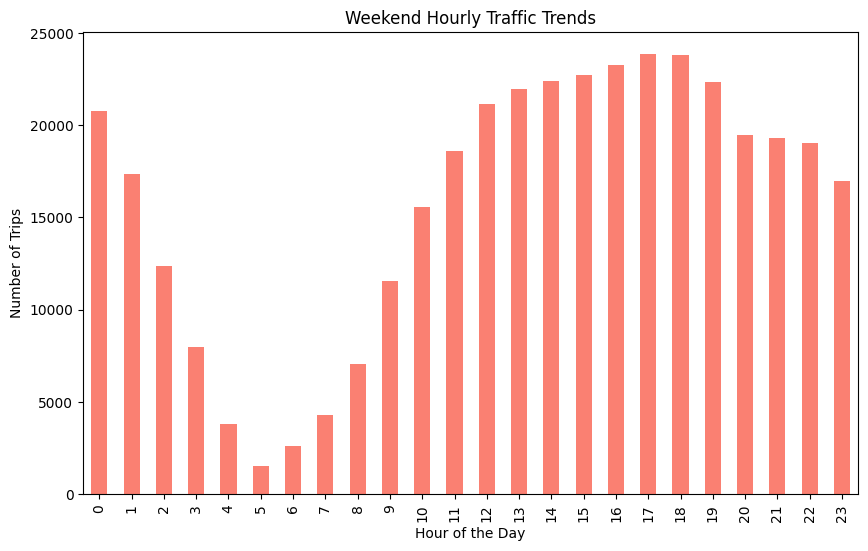

In [102]:
# Compare traffic trends for the week days

# Filter data for weekdays (Monday - Friday)
weekday_data = df_filtered[df_filtered['tpep_pickup_datetime'].dt.dayofweek.isin(range(0, 5))]

# Group by hour and count trips
weekday_hourly_trips = weekday_data.groupby(weekday_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Visualize weekday hourly trends
plt.figure(figsize=(10, 6))
weekday_hourly_trips.plot(kind='bar', color='skyblue')
plt.title('Weekday Hourly Traffic Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()

# Compare traffic trends for the weekends
weekend_data = df_filtered[df_filtered['tpep_pickup_datetime'].dt.dayofweek.isin([5, 6])]

# Group by hour and count trips
weekend_hourly_trips = weekend_data.groupby(weekend_data['tpep_pickup_datetime'].dt.hour)['VendorID'].count()

# Visualize weekend hourly trends
plt.figure(figsize=(10, 6))
weekend_hourly_trips.plot(kind='bar', color='salmon')
plt.title('Weekend Hourly Traffic Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Show all hours on x-axis
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [103]:
#Inferences from the patterns:

# Weekday Pattern:
weekday_peak_hours = weekday_hourly_trips.idxmax() # Find hour with most trips
weekday_quiet_hours = weekday_hourly_trips.idxmin() # Find hour with least trips
print(f"Weekday peak hours are around {weekday_peak_hours}, quiet hours are around {weekday_quiet_hours}")

# Weekend Pattern:
weekend_peak_hours = weekend_hourly_trips.idxmax()
weekend_quiet_hours = weekend_hourly_trips.idxmin()
print(f"Weekend peak hours are around {weekend_peak_hours}, quiet hours are around {weekend_quiet_hours}")

Weekday peak hours are around 18, quiet hours are around 4
Weekend peak hours are around 17, quiet hours are around 5


Observation: Weekdays see peak demand during commuting hours, while weekends
have a more even distribution with a possible late-night peak.

#How finding busy/quiet hours helps:

a) Operational Efficiency:
- During peak hours, deploy more taxis to high-demand areas to reduce wait times.
- During quiet hours, reduce the number of active taxis to minimize fuel consumption and driver downtime.

b) Pricing Strategies:
- Implement surge pricing during peak hours to capitalize on high demand and potentially incentivize drivers.
- Offer discounts or promotions during quiet hours to attract more riders and increase revenue during off-peak times.

c) Customer Experience:
- By anticipating demand, allocate taxis proactively to reduce passenger waiting and improve satisfaction.
- Provide real-time information to passengers about estimated wait times and fare variations based on time and location.

d) Driver Satisfaction:
- Guide drivers towards high-demand areas during peak hours to increase their earning potential.
- Allow drivers to take breaks or switch shifts strategically during quiet hours.

This analysis can support more efficient taxi operations, increased revenue, and enhanced customer and driver satisfaction.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [104]:
#Find top 10 pickup zones

# Group by pickup location ID and count the number of trips
top_pickup_zones = df_filtered.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the top 10 pickup zones
print("Top 10 Pickup Zones:\n", top_pickup_zones)

Top 10 Pickup Zones:
 PULocationID
237    69940
161    67855
132    64045
236    63781
162    52777
138    51746
142    48979
186    48658
230    44528
170    43267
Name: VendorID, dtype: int64


In [105]:
#Find top 10 dropoff zones

# Group by dropoff location ID and count the number of trips
top_dropoff_zones = df_filtered.groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the top 10 dropoff zones
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)


Top 10 Dropoff Zones:
 DOLocationID
236    67563
237    62589
161    55495
170    43304
239    42771
142    41544
162    41442
141    39824
230    39464
68     36188
Name: VendorID, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [106]:
#Find the ratio of pickups and dropoffs in each zone
# Group by pickup and dropoff locations
pickup_counts = df_filtered.groupby('PULocationID')['VendorID'].count().reset_index()
dropoff_counts = df_filtered.groupby('DOLocationID')['VendorID'].count().reset_index()

pickup_counts.rename(columns={'VendorID': 'pickup_count'}, inplace=True)
dropoff_counts.rename(columns={'VendorID': 'dropoff_count'}, inplace=True)

# Merge pickup and dropoff counts into a single DataFrame
zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')

# Rename columns
zone_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Calculate medians for pickup_count and dropoff_count
median_pickup_count = zone_counts['pickup_count'].median()
median_dropoff_count = zone_counts['dropoff_count'].median()

# Fill NaN values with medians
zone_counts['pickup_count'].fillna(median_pickup_count, inplace=True)
zone_counts['dropoff_count'].fillna(median_dropoff_count, inplace=True)

# Calculate pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

# Handle division by zero (replace infinite values with NaN) - still needed
zone_counts.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the DataFrame with pickup/dropoff ratio
print(zone_counts[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
0           1.0         119.0         4003.0              0.029728
1           2.0           2.0          215.5              0.009281
2           NaN          23.0           52.0              0.442308
3           4.0        1417.0         5232.0              0.270833
4           NaN          23.0            5.0              4.600000
..          ...           ...            ...                   ...
255       261.0        6946.0         6474.0              1.072907
256       262.0       19342.0        23573.0              0.820515
257       263.0       27952.0        31384.0              0.890645
258       264.0       13269.0        13788.0              0.962359
259       265.0         548.0         4665.0              0.117471

[260 rows x 4 columns]


In [107]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Sort by pickup/dropoff ratio in descending order (highest ratios first)
top_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=False).head(10)

# Sort by pickup/dropoff ratio in ascending order (lowest ratios first)
# and filter out rows with NaN ratios for bottom 10
bottom_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio']).dropna().head(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios[['LocationID', 'pickup_dropoff_ratio']])
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios[['LocationID', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
      LocationID  pickup_dropoff_ratio
69         70.0             13.665245
198         NaN             11.500000
43          NaN              7.666667
126       132.0              4.628867
181         NaN              4.600000
4           NaN              4.600000
83          NaN              3.833333
29          NaN              3.285714
170         NaN              2.875000
132       138.0              2.857948

Bottom 10 Pickup/Dropoff Ratios:
      LocationID  pickup_dropoff_ratio
221       227.0              0.006536
199       205.0              0.006803
251       257.0              0.011024
50         51.0              0.012658
159       165.0              0.013043
13         14.0              0.013569
168       174.0              0.015152
17         18.0              0.016129
248       254.0              0.016129
143       149.0              0.016393


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [108]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (11 PM to 5 AM)
night_trips = df_filtered[
    (df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5)
]

# Find top 10 pickup zones during night hours
night_pickups = night_trips.groupby('PULocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Find top 10 dropoff zones during night hours
night_dropoffs = night_trips.groupby('DOLocationID')['VendorID'].count().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Pickup Zones during Night Hours:\n", night_pickups)
print("\nTop 10 Dropoff Zones during Night Hours:\n", night_dropoffs)

Top 10 Pickup Zones during Night Hours:
 PULocationID
79     12725
249    10432
132     8816
148     7957
48      7657
114     7272
230     5624
186     4877
164     4694
138     4674
Name: VendorID, dtype: int64

Top 10 Dropoff Zones during Night Hours:
 DOLocationID
79     6733
48     5011
170    4939
107    4789
141    4376
68     4302
263    4175
249    4118
239    3668
229    3596
Name: VendorID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [109]:
# Filter for night hours (11 PM to 5 AM)

night_trips = df_filtered[
    (df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5)
]

# Calculate nighttime revenue
night_revenue = night_trips['total_amount'].sum()

# Calculate daytime revenue
day_trips = df_filtered[
    ~((df_filtered['tpep_pickup_datetime'].dt.hour >= 23) | (df_filtered['tpep_pickup_datetime'].dt.hour < 5))
]
day_revenue = day_trips['total_amount'].sum()

# Calculate revenue share
total_revenue = night_revenue + day_revenue
night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

print(f"Nighttime Revenue Share: {night_share:.2%}")
print(f"Daytime Revenue Share: {day_share:.2%}")


Nighttime Revenue Share: 11.35%
Daytime Revenue Share: 88.65%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [110]:
# Analyse the fare per mile per passenger for different passenger counts
# Group data by passenger count
fare_per_mile_per_passenger = df.groupby('passenger_count').apply(
    lambda group: (group['fare_amount'].sum() / group['trip_distance'].sum()) / group['passenger_count'].iloc[0]
    # Calculate fare per mile and divide by passenger count
).reset_index(name='fare_per_mile_per_passenger')

# Display the results
print(fare_per_mile_per_passenger)

   passenger_count  fare_per_mile_per_passenger
0              1.0                     0.000041
1              2.0                     0.000019
2              3.0                     0.000013
3              4.0                     0.000010
4              5.0                     0.000008
5              6.0                     0.000007


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

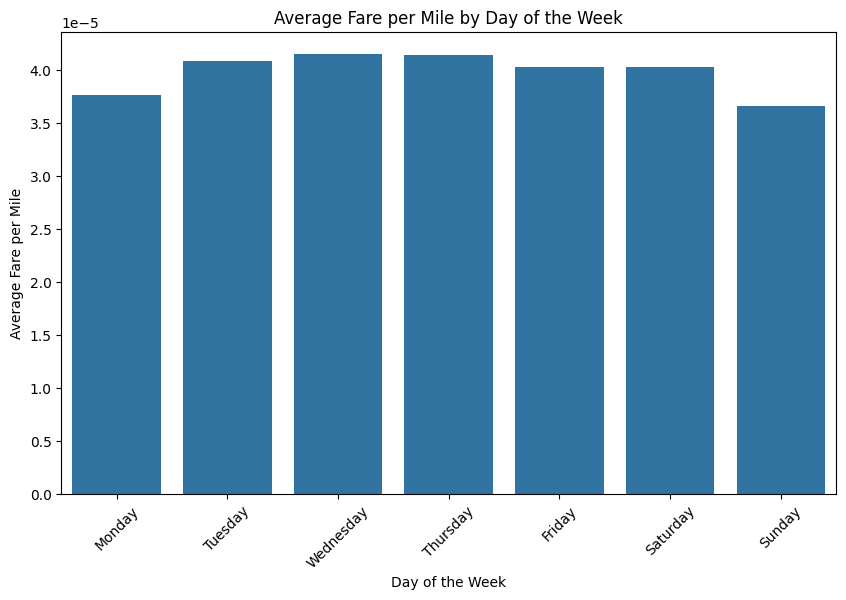

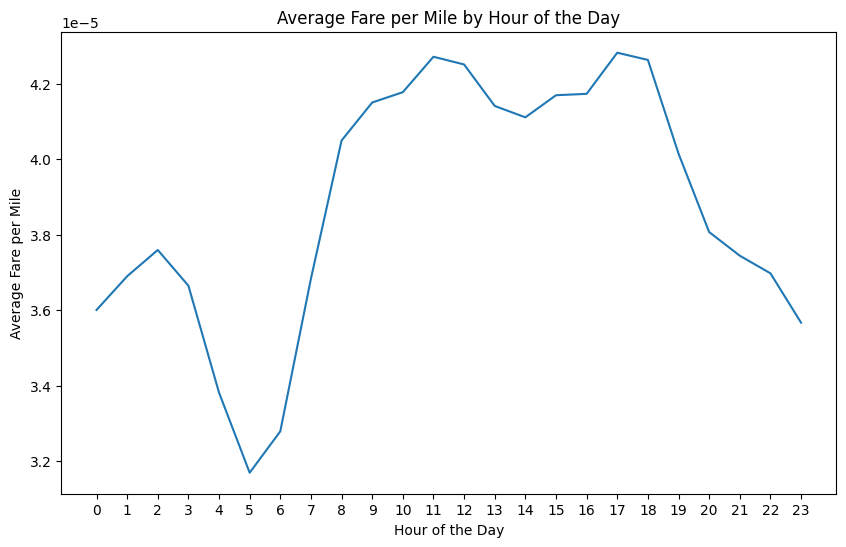

In [111]:
# Compare the average fare per mile for different days and for different times of the day

# Group by day of the week and calculate average fare per mile
day_of_week_fares = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.dayofweek)[['fare_amount', 'trip_distance']].sum()
day_of_week_fares['fare_per_mile'] = day_of_week_fares['fare_amount'] / day_of_week_fares['trip_distance']

# Map day numbers to day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_fares.index = day_of_week_fares.index.map(lambda x: days[x])

# Visualize average fare per mile for different days
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_fares.index, y=day_of_week_fares['fare_per_mile'])
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)
plt.show()

# Group by hour of the day and calculate average fare per mile
hourly_fares = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.hour)[['fare_amount', 'trip_distance']].sum()
hourly_fares['fare_per_mile'] = hourly_fares['fare_amount'] / hourly_fares['trip_distance']

# Visualize average fare per mile for different hours
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_fares.index, y=hourly_fares['fare_per_mile'])
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(24))
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

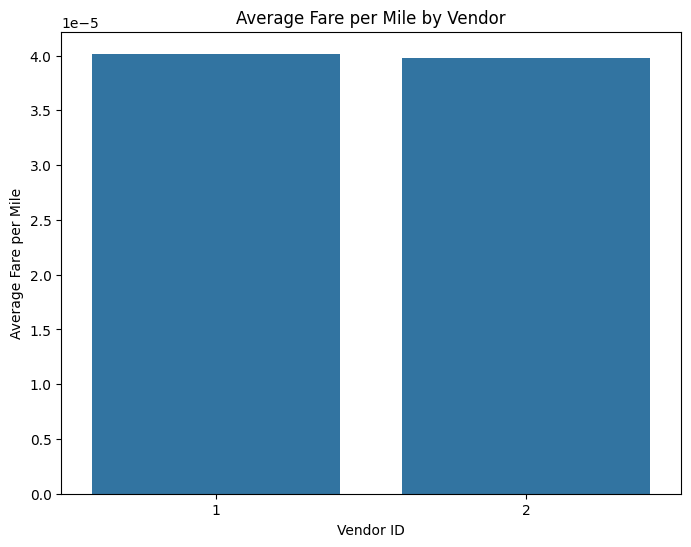

In [112]:
# Compare fare per mile for different vendors

# Group data by vendor ID and calculate fare per mile
vendor_fares = df_filtered.groupby('VendorID').apply(lambda x: x['fare_amount'].sum() / x['trip_distance'].sum() if x['trip_distance'].sum() != 0 else 0).reset_index(name='fare_per_mile')


# Visualize fare per mile for different vendors
plt.figure(figsize=(8, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=vendor_fares)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


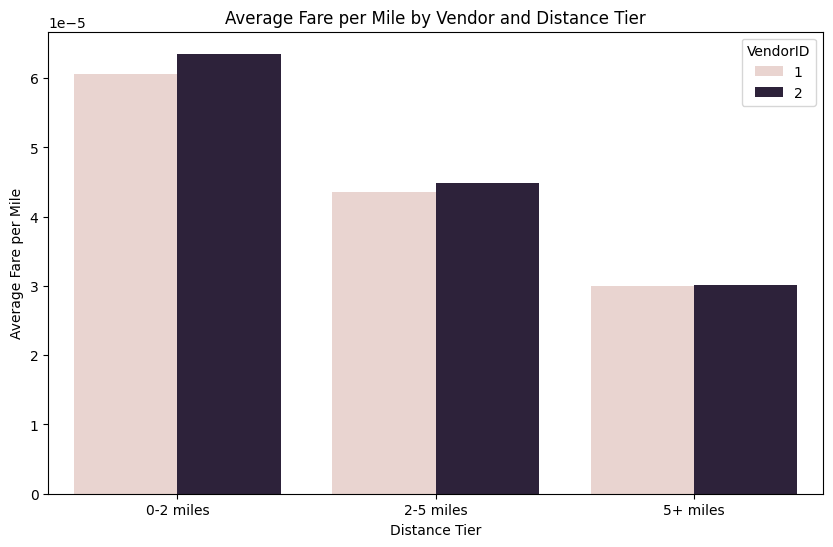

In [113]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

# Apply the distance_tier function to create a new 'distance_tier' column
df_filtered['distance_tier'] = df_filtered['trip_distance'].apply(distance_tier)

# Group by vendor ID and distance tier, then calculate average fare per mile
tiered_fares = df_filtered.groupby(['VendorID', 'distance_tier'])[['fare_amount', 'trip_distance']].sum().reset_index()
tiered_fares['fare_per_mile'] = tiered_fares['fare_amount'] / tiered_fares['trip_distance']

# Visualize the tiered fares
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=tiered_fares)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip Percentage by Distance Tier:
 distance_tier
0-2 miles    2.240695e+06
2-5 miles    2.171483e+06
5+ miles     2.161075e+06
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
 passenger_count
1.0    2.207545e+06
2.0    2.208911e+06
3.0    2.204418e+06
4.0    2.226058e+06
5.0    2.208932e+06
6.0    2.220931e+06
Name: tip_percentage, dtype: float64

Average Tip Percentage by Pickup Hour:
 tpep_pickup_datetime
0     2.172383e+06
1     2.174640e+06
2     2.176515e+06
3     2.182470e+06
4     2.228535e+06
5     2.186224e+06
6     2.173263e+06
7     2.179271e+06
8     2.192088e+06
9     2.221875e+06
10    2.242985e+06
11    2.249134e+06
12    2.246409e+06
13    2.248999e+06
14    2.241452e+06
15    2.226843e+06
16    2.200680e+06
17    2.187036e+06
18    2.185906e+06
19    2.175664e+06
20    2.202886e+06
21    2.208068e+06
22    2.199434e+06
23    2.183822e+06
Name: tip_percentage, dtype: float64


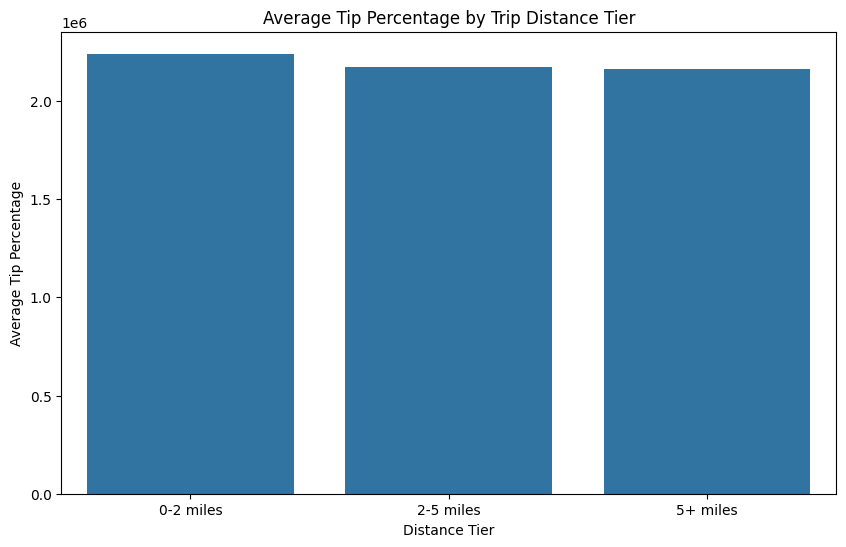

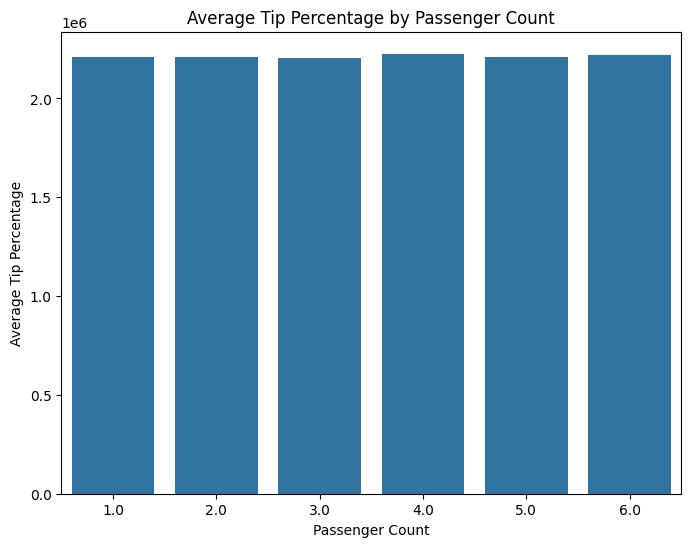

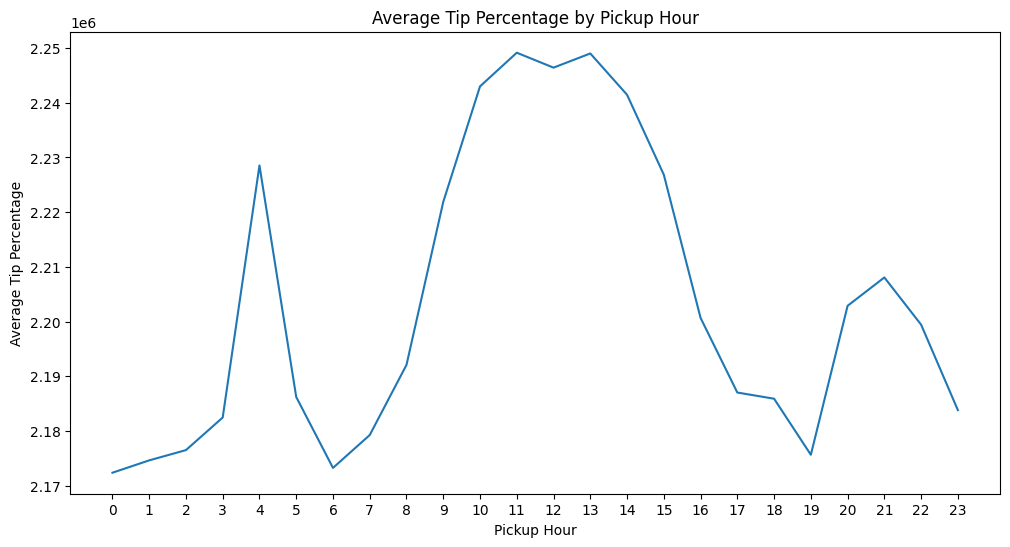

In [114]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Group by trip distance and calculate average tip percentage
tip_by_distance = df_filtered.groupby('distance_tier')['tip_percentage'].mean()

# Group by passenger count and calculate average tip percentage
tip_by_passenger_count = df_filtered.groupby('passenger_count')['tip_percentage'].mean()

# Group by pickup hour and calculate average tip percentage
tip_by_pickup_hour = df_filtered.groupby(df_filtered['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean()

# Print the results
print("Average Tip Percentage by Distance Tier:\n", tip_by_distance)
print("\nAverage Tip Percentage by Passenger Count:\n", tip_by_passenger_count)
print("\nAverage Tip Percentage by Pickup Hour:\n", tip_by_pickup_hour)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values)
plt.title('Average Tip Percentage by Trip Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=tip_by_passenger_count.index, y=tip_by_passenger_count.values)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=tip_by_pickup_hour.index, y=tip_by_pickup_hour.values)
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(24))
plt.show()

# Further analysis to identify factors leading to low tip percentages
low_tip_threshold = 5  # Define a threshold for low tip percentage
low_tip_trips = df_filtered[df_filtered['tip_percentage'] < low_tip_threshold]

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [115]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate tip percentage
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['total_amount']) * 100

# Filter trips into two groups
low_tip_trips = df_filtered[df_filtered['tip_percentage'] < 10]
high_tip_trips = df_filtered[df_filtered['tip_percentage'] > 25]


# Compare the two groups (example: average trip distance)
# Handle NaN values for low tip trips

# Check if all values in 'trip_distance' are NaN for low_tip_trips
if low_tip_trips['trip_distance'].isnull().all():
    avg_distance_low_tip = 0  # Assign 0 if all values are NaN
else:
    avg_distance_low_tip = low_tip_trips['trip_distance'].min() #use min instead of mean to get a valid value.

avg_distance_high_tip = high_tip_trips['trip_distance'].mean()

print(f"Average distance for low tip trips: {avg_distance_low_tip}")
print(f"Average distance for high tip trips: {avg_distance_high_tip}")

Average distance for low tip trips: 0
Average distance for high tip trips: 3.407632664861512


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

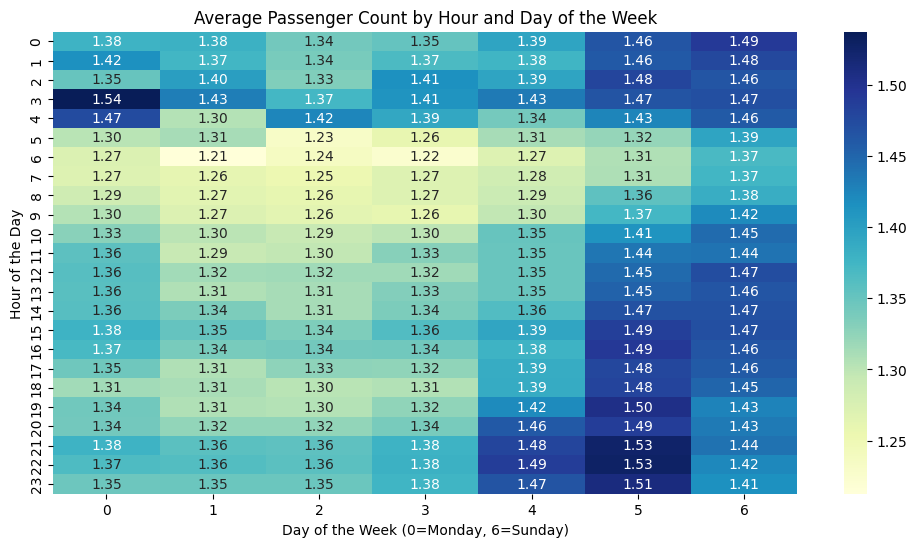

In [116]:
# See how passenger count varies across hours and days

# 1. Extract hour and day of the week from the pickup datetime
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_dayofweek'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 2. Group by hour and day of the week, then calculate average passenger count
passenger_counts = df_filtered.groupby(['pickup_hour', 'pickup_dayofweek'])['passenger_count'].mean().reset_index()

# 3. Visualize the results using a heatmap
plt.figure(figsize=(12, 6))
# Use keyword arguments for index, columns, and values
sns.heatmap(passenger_counts.pivot(index='pickup_hour', columns='pickup_dayofweek', values='passenger_count'),
            cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Average Passenger Count by Zone:
      PULocationID  avg_passengers
0               1        1.596639
1               2        1.000000
2               4        1.442484
3               6        2.000000
4               7        1.361314
..            ...             ...
232           261        1.494673
233           262        1.333368
234           263        1.340799
235           264        1.321501
236           265        1.525547

[237 rows x 2 columns]


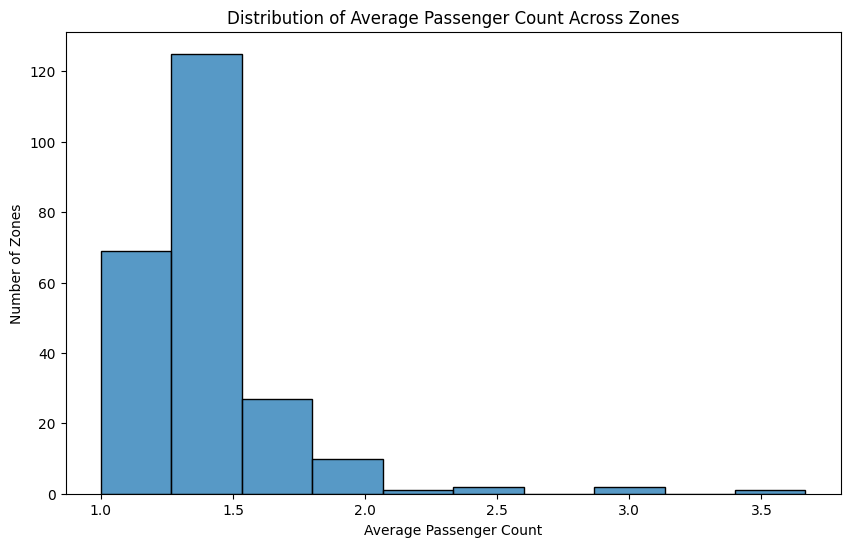

In [117]:
# How does passenger count vary across zones

# Group by pickup zone and calculate average passenger count
passenger_count_by_zone = df_filtered.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Rename columns for clarity
passenger_count_by_zone.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)

# Display the results
print("Average Passenger Count by Zone:\n", passenger_count_by_zone)

# Visualize the distribution using a histogram or bar plot
plt.figure(figsize=(10, 6))
sns.histplot(passenger_count_by_zone['avg_passengers'], bins=10)
plt.title('Distribution of Average Passenger Count Across Zones')
plt.xlabel('Average Passenger Count')
plt.ylabel('Number of Zones')
plt.show()

In [118]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Load taxi zone data
zones = gpd.read_file('/content/drive/MyDrive/NYC Yellow Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp')

# Merge trip data with zone data
zones_with_trips = pd.merge(df_filtered, zones[['LocationID', 'zone', 'borough', 'geometry']],
                            left_on='PULocationID', right_on='LocationID', how='left')

# Convert to GeoDataFrame
zones_with_trips = gpd.GeoDataFrame(zones_with_trips, geometry='geometry')

# Create a new column for the average passenger count in each zone.
# 1. Calculate average passenger count per zone
avg_passenger_count = zones_with_trips.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)

# 2. Merge with zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_count, on='PULocationID', how='left')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [119]:
# How often is each surcharge applied?

# Select the surcharge columns
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']

# Calculate the frequency of each surcharge being applied (non-zero values)
surcharge_frequency = df_filtered[surcharge_cols].apply(lambda col: (col > 0).sum() / len(df))

# Print the results
print("Surcharge Frequency:")
print(surcharge_frequency)

Surcharge Frequency:
extra                    0.490800
mta_tax                  0.768522
improvement_surcharge    0.774346
tolls_amount             0.062831
congestion_surcharge     0.733956
Airport_fee              0.063721
dtype: float64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Okay, here are some recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies, based on the analysis performed in the notebook:

**Recommendations**

**Demand-Based Dispatching:** Implement a dynamic dispatching system that considers real-time demand patterns, such as the busiest hours, days, and locations, identified in the analysis. This system can prioritize trips to high-demand areas and allocate taxis accordingly, reducing passenger wait times and potentially increasing revenue. \

**Route Optimization:** Utilize route optimization algorithms to suggest the most efficient routes for drivers based on real-time traffic conditions and historical data. This can minimize travel times, fuel consumption, and overall operational costs. \

**Congestion Management:** During peak hours or in congested areas, consider implementing strategies to manage demand and traffic flow. For example, you could introduce dynamic pricing to incentivize trips during off-peak times or offer alternative routes to avoid traffic hotspots. \

**Predictive Modeling:** Develop predictive models to forecast demand patterns for different locations and times of the day. This can help you proactively allocate resources and optimize routing strategies in anticipation of future demand. \

**Driver Incentives:** Consider offering incentives to drivers for accepting trips to high-demand areas during peak hours or taking on less popular routes. This can help ensure that taxis are available where and when they are most needed. \


**Reasoning**

These recommendations are based on the following insights from the analysis:

**Demand Patterns:** The analysis revealed patterns in taxi pickups by hour, day, and month, indicating areas and times of high demand. Demand-based dispatching and route optimization can address these patterns effectively. \

**Operational Inefficiencies:** The analysis identified slow routes and potential bottlenecks. Route optimization and congestion management strategies can mitigate these inefficiencies and improve overall operational efficiency. \
**Financial Considerations:** By optimizing routing and dispatching, taxi operations can potentially reduce fuel costs, increase revenue, and enhance customer satisfaction.

**Additional Considerations**

**Data Collection:** Continuously collect and analyze data on taxi trips, traffic patterns, and passenger demand to ensure the effectiveness of these strategies and adapt them over time. \

**Technology Integration:** Utilize technology, such as GPS tracking and mobile apps, to enable real-time monitoring and communication with drivers and passengers. \

**Driver Training:** Provide drivers with training on optimal routing practices and demand patterns to help them make better decisions on the road. \


**Conclusion**

By implementing these recommendations, you can help optimize taxi operations, improve efficiency, and enhance passenger experience in NYC. These strategies are supported by the insights obtained from the exploratory data analysis conducted in the notebook, making them data-driven and likely to yield positive results. Let me know if you have any other questions.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

some suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analyzing trip trends across time, days, and months:

**Suggestions**

**High-Demand Zones:** Increase the number of cabs stationed in high-demand zones during peak hours and days, as identified in the analysis. These zones are likely to experience a higher volume of pickups, and positioning cabs there can help reduce passenger wait times and increase the chances of picking up a ride quickly. \

**Time-Based Deployment:** Adjust cab deployment based on the temporal patterns observed in the data. For example, if the analysis shows a surge in demand during specific hours, such as rush hour or late evenings, consider increasing cab presence in zones that experience higher demand during those times. \

**Day-of-Week Variation:** Take into account the day-of-week variations in demand when deploying cabs. If certain zones experience higher demand on weekdays compared to weekends, allocate more cabs to those zones accordingly. \

**Monthly Trends:** Consider monthly trends as well. For instance, if demand patterns change significantly during specific months, such as during holidays or special events, adjust cab deployment to accommodate these trends. \

**Predictive Modeling:** Utilize predictive models, if available, to forecast demand patterns for different zones and times. This can help you proactively allocate resources and strategically position cabs where they are most likely to be needed. \

**Repositioning Strategies:** Implement strategies to reposition cabs efficiently during slower periods or in areas with lower demand. For example, you could offer incentives to drivers to move to high-demand zones or implement a dynamic routing system that guides drivers to areas where pickups are more likely. \

**Data-Driven Monitoring:** Continuously monitor trip data and adjust cab positioning strategies as needed. By collecting and analyzing real-time data, you can ensure that your deployment strategies are effective and aligned with evolving demand patterns. \

**Reasoning**

These suggestions are based on the premise that trip trends across time, days, and months provide valuable insights into passenger demand patterns. By strategically positioning cabs based on these insights, taxi operations can potentially increase efficiency, reduce passenger wait times, and maximize revenue.

**Benefits**

**Improved Efficiency:** By aligning cab deployment with demand patterns, you can optimize resource utilization and reduce idle time for drivers. \

**Enhanced Customer Experience:** Reduced wait times and faster pickup experiences can lead to increased customer satisfaction. \

**Increased Revenue:** By efficiently meeting demand, taxi operations can potentially increase revenue by completing more trips and minimizing downtime. \

**Implementation**

To implement these suggestions, you can use a combination of historical data, real-time monitoring, and predictive modeling tools to inform your cab positioning strategies. The specific implementation will depend on your data infrastructure, dispatching systems, and communication channels with drivers. By effectively leveraging trip data, you can create a more dynamic and efficient taxi operation in NYC.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Okay, here are some data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors, based on the analysis performed on the NYC Yellow Taxi data:

**Proposed Adjustments**

**Demand-Based Pricing:** Implement a dynamic pricing model that adjusts fares based on real-time demand patterns. This means that during periods of high demand, such as rush hour or late evenings, fares could be slightly higher to reflect the increased competition for rides. Conversely, during off-peak hours or in areas with lower demand, fares could be adjusted lower to encourage ridership. \


**Zone-Based Pricing:** Consider implementing zone-based pricing, where fares are adjusted based on the pickup and dropoff locations. Zones with higher demand or longer travel distances could have higher fares to reflect the increased operational costs.

**Trip Duration Pricing:** Incorporate trip duration into the pricing model. Longer trips could have a higher fare component to compensate drivers for the increased time and mileage. This can also help incentivize drivers to accept longer trips, which might be less desirable under a flat-rate pricing structure.

**Passenger Count Pricing:** Introduce a surcharge for additional passengers beyond a certain threshold. This can help cover the increased costs associated with carrying more passengers and potentially encourage larger groups to consider alternative transportation options.

**Minimum Fare Adjustment:** Analyze the distribution of fare amounts and consider adjusting the minimum fare to better reflect the average cost of a short trip. This can help ensure that drivers are adequately compensated for shorter rides.

**Competitor Monitoring:** Regularly monitor the pricing strategies of other taxi vendors to ensure that your rates remain competitive. This can involve tracking their fares for different trip types, analyzing their surge pricing patterns, and adjusting your pricing accordingly to stay in line with market trends.

**Reasoning**

These adjustments are based on the following insights from the analysis:

**Demand Patterns:** The analysis revealed significant variations in demand across different times of the day, days of the week, and locations. Demand-based pricing can help capture this variability and optimize revenue. \

**Trip Characteristics:** The analysis showed a relationship between fare amounts, trip distances, and trip durations. Incorporating these factors into the pricing model can ensure that fares accurately reflect the cost of providing the service. \

**Competitive Landscape:** Maintaining competitive rates is crucial for attracting passengers. Monitoring competitor pricing strategies can help you adjust your pricing to stay in line with market trends. \

**Data-Driven Implementation**

To implement these adjustments effectively, you can use the following data-driven approach:

**Data Collection:** Continuously collect data on taxi trips, including fare amounts, trip distances, trip durations, pickup and dropoff locations, passenger counts, and competitor pricing.

**Demand Modeling:** Develop predictive models to forecast demand patterns for different times, locations, and trip types. This can help you adjust fares proactively based on anticipated demand.

**Price Optimization:** Utilize price optimization algorithms to determine the optimal fare structure for different scenarios. These algorithms can take into account demand patterns, trip characteristics, competitor pricing, and other relevant factors.

**A/B Testing:** Conduct A/B testing to evaluate the impact of pricing changes on ridership and revenue. This involves comparing the performance of different pricing strategies in a controlled environment to determine which strategy yields the best results.

**Iterative Refinement:** Continuously monitor the performance of your pricing strategy and make iterative adjustments based on data analysis and feedback. By adopting a data-driven approach, you can fine-tune your pricing strategy over time to maximize revenue while maintaining competitiveness.

**Conclusion**

By implementing these data-driven adjustments to the pricing strategy, you can potentially increase revenue, optimize resource utilization, and enhance passenger satisfaction while remaining competitive in the NYC taxi market. The key is to leverage the insights gained from data analysis to inform pricing decisions and adapt your strategy to evolving market dynamics. Let me know if you have any other questions.